# ESP operation

The module `Modules.ESP` contains the class `ESP` which can be called to operate **a single axis** of the physical ESP. The syntax is `ESP(axis, MAX_POSITION, testflight)`, where `axis` can be 1-3, corresponding to the connected devices on the ESP. `MAX_POSITION` is a two-element list defining the bounds of the axis in degress. Finally, the boolean `testflight` can be set to `True` to test and run code without having any physical devices connected.

In [1]:
#Initialize ESP
from Modules.ESP import *
cam_arm = ESP(axis = 1)

13:36  Not running on Windows platform. Turning on testflight mode.


### Setting up the ESP home positions
Every time the ESP is switched on, the current positions of the axes will be defined as 0. For obvious reasons this is not very confenient. Therefore it is good practice to redefine your home positions (angle = 0) before you start a measurement run. This can be done by calling the function `ESP.define_home()`.

In [2]:
cam_arm.define_home()

13:36  ***  NEW HOME SEQUENCE   ***
Current position:         0.0
Please move axis 1 to desired position manually and press enter.
Selected position:         0.0
Are you sure you want to use this position? (Y/N)y
New home position saved.


### Moving the ESP
Congratulation, you are all set! There are a number of different commands to move the initialized axes, and luckily they are all very straightforward.
```
ESP.get_current_position() -> float
ESP.move_relative(degrees)
ESP.move_absolute(degrees)
ESP.move_home()
```
To send an ASCII command directly to the ESP, you can use the function `ESP.send_command(command)`. This function returns `True` if the command was sent succesfully and `False` if not. In the latter case it also prints the received error code. Please refer to the ESP documentation to find out what your error code means.

In [3]:
#cam_arm.move_relative(degrees)
#cam_arm.move_absolute(degrees)
#cam_arm.move_home(degrees)

# Camera operation

The module `Modules.camera` contains the class `Cam` which can be called to connect to the *ThorLabs DCC1645C* camera. The syntax is `Cam(testflight=False)`. The boolean `testflight` can be set to `True` to test and run code without having any physical devices connected.

**WARNING**
After initializing the connection with e.g. `cam = Cam()`, rerunning that command will produce an error because the camera is already connected. The only way te resolve this, is to first call `Cam.shutdown()`. When running the file `camera.py` from the command line, this problem is resolved with an `atexit` call that automatically closes the connection when the program terminates.

In [1]:
from Modules.camera import *
cam = Cam()

13:37  *** Initializing connection with camera ***


13:37  Taking median of captured images.


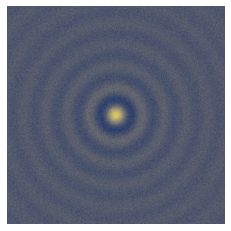

In [4]:
img = cam.take_images(nframes=100,median=True,show=True)

# Test blocks please ignore

In [6]:
import time
print (time.strftime('%Y-%m-%d',time.localtime()))
print(time.localtime())

2021-11-03
time.struct_time(tm_year=2021, tm_mon=11, tm_mday=3, tm_hour=11, tm_min=16, tm_sec=22, tm_wday=2, tm_yday=307, tm_isdst=0)
